<h1><center> LAS CONSECUENCIAS DE LA GUERRA: ANÁLISIS A PARTIR DE LOS ACUERDOS DE PAZ</center></h1>

Para este estudio nos basamos en un conjunto de datos de todos los acuerdos de paz firmados desde 1990 creada y mantenida por la Law School de la University of Edinburgh. A través del análisis de datos y la visualización de datos, buscamos analizar y presentar los temas que se abordan principalmente en los acuerdos de paz, para posteriormente conseguir sacar conclusiones a partir de dichos datos. Las situaciones de los distintos países registrados en la base de datos pueden explicarse a partir de los acuerdos de paz y de las guerras que sufrieron.

La base de datos consta de un total de 1789 registros, cada uno con 266 atributos correspondientes a diferentes características de cada acuerdo de paz. En el presente documento buscaremos tendencias que nos permitan llegar a conclusiones y valores no habituales dentro del conjunto de datos. También incluimos visualizaciones senzillas de los datos para extraer un conocimiento mayor y tener una visión más genérica de su contenido.

Utilizamos el formato notebook para incluir en un mismo documento todo el contenido, tanto el código utilizado como las conclusiones extraídas así como las urls a visualizaciones creadas con Tableau. Hemos utilizado distintas librerías de python importadas a continuación para la exploración de los datos.

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
data = pd.read_csv('/home/miquel/Escritorio/UOC/Q1_19_20/VISUALIZACION_DATOS/PEC2/pax_data_1789_agreements_08-11-19.csv')

In [8]:
data.head()

,Con,Contp,PP,PPName,Reg,AgtId,Agt,Dat,Status,Lgt,...,TjRep,TjRSym,TjRMa,TjNR,ImUN,ImOth,ImRef,ImPK,ImE,ImSrc
0,Afghanistan,Government,2.0,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,1739,Agreement between the Islamic Republic of Afgh...,2016-09-22,Multiparty signed/agreed,4,...,0,0,0,0,0,0,0,0,1,1
1,Afghanistan,Government,2.0,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,1923,Agreement between the two campaign teams regar...,2014-09-21,Multiparty signed/agreed,4,...,0,0,0,0,1,1,0,0,0,1
2,Afghanistan,Government,2.0,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,864,Tokyo Declaration Partnership for Self-Relianc...,2012-07-08,Multiparty signed/agreed,14,...,0,0,0,1,0,0,0,0,1,1
3,Afghanistan,Government,2.0,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,848,Conclusions of the Conference on Afghanistan a...,2011-12-05,Multiparty signed/agreed,7,...,0,0,0,1,1,0,0,0,0,1
4,Afghanistan,Government,2.0,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,849,Istanbul Process on Regional Security and Coop...,2011-11-02,Multiparty signed/agreed,10,...,0,0,0,1,0,0,0,0,0,1


Comprobamos como el conjunto de datos consta de una serie de atributos de tipo cadena, algunos de los cuáles contienen nulos, lo que nos indica que para dichos acuerdos se desconocen algunas características. También tenemos un conjunto de atributos que a primera vista parecen numéricos, pero realmente son categóricos, y los cuáles hacen referencia a la aparición o no  de referencias a ciertos temas dentro del acuerdo de paz. Para estos atributos no tenemos valores nulos ya que cuando no se tienen referencias se rellenan los atributos con el valor 0. A continuación chequeamos que valores nulos contiene cada atributo.

Además de transformar las variables en categóricas, también deberemos realizar transformaciones en el campo "Con", ya que hay países que aparecen con nombres distintos.

In [4]:
missing_values = data.isna().sum()
print(missing_values)

Con                0
Contp              0
PP                 7
PPName             7
Reg                0
AgtId              0
Agt                0
Dat                0
Status             0
Lgt                0
N_characters       0
Agtp               0
Stage              0
StageSub          29
Part              15
ThrdPart         869
OthAgr           852
Loc1ISO           44
Loc2ISO         1557
Loc1GWNO          20
Loc2GWNO        1557
UcdpCon          146
UcdpAgr         1492
PamAgr          1756
CowWar           678
GCh                0
GChRhet            0
GChAntid           0
GChSubs            0
GChOth             0
                ... 
SsrPsf             0
SsrFf              0
Cor                0
SsrCrOcr           0
SsrDrugs           0
Terr               0
TjGen              0
TjAm               0
TjAmPro            0
TjSan              0
TjPower            0
TjAmBan            0
TjCou              0
TjJaNc             0
TjJaIc             0
TjMech             0
TjPrire      

A continuación printamos un resumen descriptivo de las variables no numéricas.

In [8]:
data.describe(exclude=[np.number])

,Con,Contp,PPName,Reg,Agt,Dat,Status,Agtp,Stage,StageSub,Part,ThrdPart,OthAgr,Loc1ISO,Loc2ISO,UcdpCon
count,1789,1789,1782,1789,1789,1789,1789,1789,1789,1760,1774,920,937,1745,232,1643
unique,169,5,151,6,1753,1470,4,4,7,21,1682,850,926,81,29,110
top,Bosnia and Herzegovina/Yugoslavia (former),Government/territory,Philippines - Mindanao process,Africa (excl MENA),Joint Statement,1998-10-26,Multiparty signed/agreed,Intra,Pre,MultIss,United Nations Security Council,"William Clinton, U.S. President; Warren Christ...",Djibouti Agreement,PHL,SDN,289
freq,133,813,124,529,8,9,1652,1293,505,238,10,8,2,158,52,129


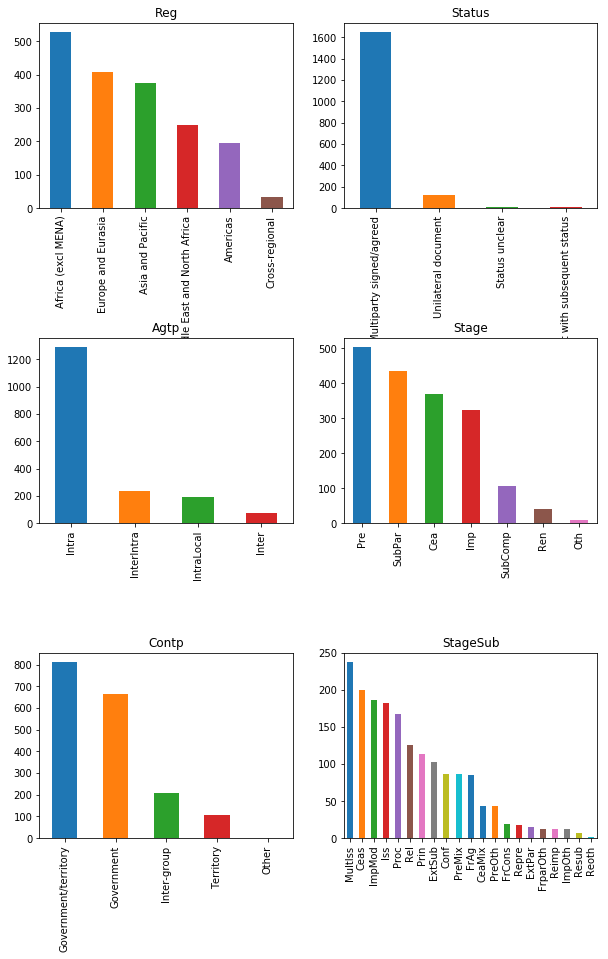

In [54]:
cols = ['Reg', 'Status', 'Agtp', 'Stage', 'Contp', 'StageSub']
fig = plt.figure(figsize=(10, 15))
for i, column in enumerate(cols):
    ax = fig.add_subplot(len(cols)/2, 2, i + 1)
    ax.set_title(column)
    if data.dtypes[column] == np.object:
        data[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

plt.show()

Observando la correlación entre las variables numéricas vemos como el hecho más reseñable es la correlación directa existente entre las distintas variables relacionadas con la inclusión de referencias a derechos humanos (civiles y políticos) en las redacciones de los acuerdos. Vemos como la aparición de referencias a hechos como la esclavitud, la tortura o la libertad de expresión entre otras están fuertemente correlacionadas. Estas correlaciones son esperadas ya que la vulneración de alguno de estos derechos suele conllevar la vulneración de otros.

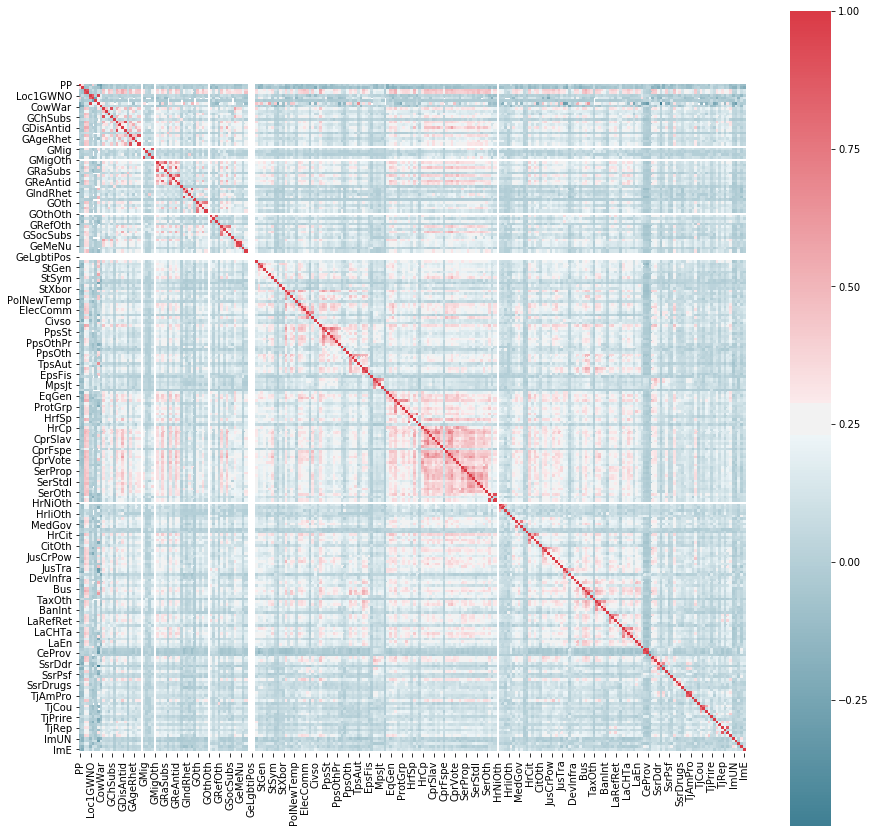

In [61]:
f, ax = plt.subplots(figsize=(15,15))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

plt.show()

Observando las distribuciones del conjunto de atributos categóricos, vemos como para la mayoría de ellos, el valor más común es 0, lo que indica que para dicho atributo no existen referencias. Las distribuciones son las esperadas ya que es complicado que los acuerdos tengan referencias a muchos temas, suelen estar centrados en unos pocos concretos y nuestra base de datos menciona muchos. A continuación visualizamos algunos ejemplos.

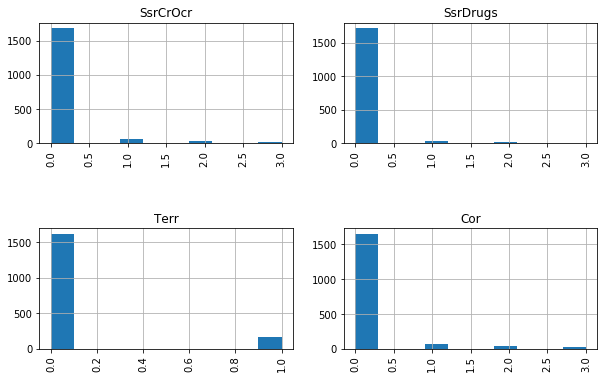

In [81]:
cols = ['SsrCrOcr', 'SsrDrugs', 'Terr', 'Cor']
fig = plt.figure(figsize=(10, 6))
for i, column in enumerate(cols):
    ax = fig.add_subplot(len(cols)/2, 2, i + 1)
    ax.set_title(column)
    if data.dtypes[column] == np.object:
        data[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

plt.show()

A continuación presentamos un conjunto de dashboards realizados con tableau para analizar los datos más detalladamente, detectando relaciones entre atributos.

En la primera visualización vemos la evolución del número de acuerdos por país y año. Incluye un mapa para tener una visión espacial así como la opción de filtrado por país. Esta visualización nos puede ayudar a detectar zonas de especial interés para periodos de tiempo concreto. Gana valor si se conoce el contexto de los países para ese período. 

El uso de una escala de colores ayuda a resaltar países con un mayor número de conflictos como Colombia o Bosnia  Herzegovina, los cuáles serán de especial interés en el estudio.

<a href="https://public.tableau.com/profile/miguel6732#!/vizhome/Acuerdosporpasyao/Acuerdosporpasyao">Visualización de los acuerdos por país y año</a>

En esta segunda visualización utilizamos diagramas de barras para ver el número de acuerdos realizados por tipo de institución, tanto a nivel de país como de región o continente. También incluye la distribución por año. Nos permite ver los tipos de acuerdo llevados a cabo en cada país, así como la evolución en el tiempo de la interveción de los distintos tipos de instituciones. Se pueden detectar patrones como conjuntos de años consecutivos con mayor frecuencia de acuerdos en función del tipo de instituciones que intervienen en el acuerdo.

<a href="https://public.tableau.com/profile/miguel6732#!/vizhome/Acuerdosportipodeinstitucin/Acuerdosportipodeinstitucininvolucrada">Visualización de los acuerdos por tipo de institución</a>

En esta tercera visualización analizamos las referencias a tráfico de drogas, crimen organizado y terrorismo. Para el tráfico de drogas, vemos como destaca el país Colombia por encima del resto. Para las refernencias al terrorismo, llaman la atención las diferencias entre el mapa que generan en comparación con el mapa generado teniendo en cuenta todos los conflictos. Para el que los incluye todos, vemos como la mayor acumulación de acuerdos se encuetran en continentes como África, mientras que si nos fijamos solo en los acuerdos con referencias a corrupción, destaca Europa por encima del continente africano. También podemos comprobar la relación entre la aparición de distintas referencias dentro de la redacción de los acuerdos. Vemos por ejemplo como las referencias a tráfico de drogas suelen ir acompañadas de referencias a crimen organizado.

<a href="https://public.tableau.com/profile/miguel6732#!/vizhome/Caractersticasconflictos/Caractersticasconflictos">Visualización de referencias en acuerdos</a>